In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Two, three, four state models

<table>
    <td> <img src='figures/simple-models/twostate.png' style="width: 200px;"> </td>
    <td> <img src='figures/simple-models/threestate.png' style="width: 200px;"> </td>
    <td> <img src='figures/simple-models/fourstate.png' style="width: 200px;"> </td>
<table>    

# Grid model

<img src="figures/simple-models/grid-model.png" style="width: 350px;">

### $N, M$ for a $m\times n$ grid

$$
M = mn ~~~~ N = n_s s + n_x x + n_y y
$$

$$
n_s = mn ~~~~ n_x = 2 ~~~~ n_y = 2(2mn + m + n - 1)
$$

### $\Delta G_\alpha$

$$
\Delta G_\alpha = \frac{1}{N}\Big[6y\log 2 - 2(s+x)(p_s\log p_s + p_x\log p_x)\Big]
$$
$$
p_s = \frac{s}{s+x} ~~~~~ p_x = \frac{x}{s+x}
$$

### $\Delta G_\beta$

$$
\Delta G_\beta = \frac{1}{N}\Big[2s\log s + 2y\log y - a_1\log a_1 - a_2\log a_2 - a_3\log a_3 + a_4\log a_4\Big]
$$

$$
a_1 = s+x+3y \\
a_2 = s+4y \\
a_3 = 2s+2y \\
a_4 = 2s+x+7y
$$

### Components of $\Delta G$ for 3x4 grid, lumping $\alpha$, $\beta$, $\gamma$

<img src="figures/simple-models/grid-delta_G_abg.png" style="width: 350px;">

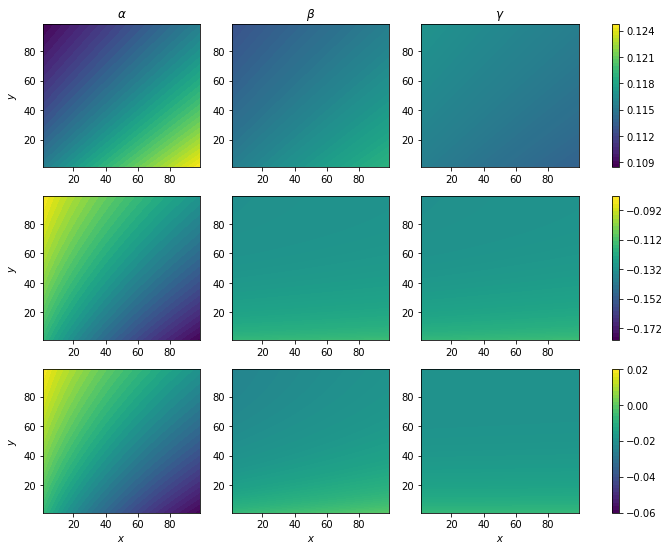

In [3]:
from gridmodel import *

s = 1000
x = np.arange(1, 100)
y = np.arange(1, 100)
X, Y = np.meshgrid(x, y)
N = calc_N_grid(m=3, n=4, s=1000, x=X, y=Y)
delta_F = calc_delta_F_noprior_grid(calc_M(m=3, n=4), N)

plogp_a = calc_plogp_alpha_grid(s, X, Y, N)
plogp_b = calc_plogp_beta_grid(s, X, Y, N)
plogp_g = calc_plogp_gamma_grid(s, Y, N)

PlogP_a = calc_PlogP_grid(s, X, N)
PlogP_b = calc_PlogP_grid(s, Y, N)
PlogP_g = calc_PlogP_grid(s, Y, N)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
nlevels = 40
#======================================================================
vmin = min(plogp_a.min(), plogp_b.min(), plogp_g.min())
vmax = max(plogp_a.max(), plogp_b.max(), plogp_g.max())

top = ax[0, 0].contourf(X, Y, plogp_a, levels=nlevels, vmin=vmin, vmax=vmax)
ax[0, 1].contourf(X, Y, plogp_b, levels=nlevels, vmin=vmin, vmax=vmax)
ax[0, 2].contourf(X, Y, plogp_g, levels=nlevels, vmin=vmin, vmax=vmax)
ax[0, 0].set_title(r'$\alpha$')
ax[0, 0].set_ylabel(r'$y$')
ax[0, 1].set_title(r'$\beta$')
ax[0, 2].set_title(r'$\gamma$')

#======================================================================
vmin = min(PlogP_a.min(), PlogP_b.min(), PlogP_g.min())
vmax = max(PlogP_a.max(), PlogP_b.max(), PlogP_g.max())

mid = ax[1, 0].contourf(X, Y, PlogP_a, levels=nlevels, vmin=vmin, vmax=vmax)
ax[1, 1].contourf(X, Y, PlogP_b, levels=nlevels, vmin=vmin, vmax=vmax)
ax[1, 2].contourf(X, Y, PlogP_g, levels=nlevels, vmin=vmin, vmax=vmax)
ax[1, 0].set_ylabel(r'$y$')

#======================================================================
logBF_a = PlogP_a + plogp_a + delta_F
logBF_b = PlogP_b + plogp_b + delta_F
logBF_g = PlogP_g + plogp_g + delta_F
vmin = min(logBF_a.min(), logBF_b.min(), logBF_g.min())
vmax = max(logBF_a.max(), logBF_b.max(), logBF_g.max())

btm = ax[2, 0].contourf(X, Y, logBF_a, levels=nlevels, vmin=vmin, vmax=vmax)
ax[2, 1].contourf(X, Y, logBF_b, levels=nlevels, vmin=vmin, vmax=vmax)
ax[2, 2].contourf(X, Y, logBF_g, levels=nlevels, vmin=vmin, vmax=vmax)
ax[2, 0].set_xlabel(r'$x$')
ax[2, 0].set_ylabel(r'$y$')
ax[2, 1].set_xlabel(r'$x$')
ax[2, 2].set_xlabel(r'$x$')

ax_top = [ax[0, 0], ax[0, 1], ax[0, 2]]
cbar_top = fig.colorbar(top, ax=ax_top)
cbar_top.set_ticks(np.arange(0.10, 0.125, 0.003))
ax_mid = [ax[1, 0], ax[1, 1], ax[1, 2]]
cbar_mid = fig.colorbar(mid, ax=ax_mid)
cbar_mid.set_ticks(np.arange(-0.172, -0.08, 0.02))
ax_btm = [ax[2, 0], ax[2, 1], ax[2, 2]]
cbar_btm = fig.colorbar(btm, ax=ax_btm)
cbar_btm.set_ticks(np.arange(-0.06, 0.025, 0.02))
fig.savefig('figures/simple-models/grid-delta_G_abg.png')

### Compare $\log BF_\alpha / N$ for different grid dimensions

<img src='figures/simple-models/grid-logBF-gridsize.png' style="width: 300px;">

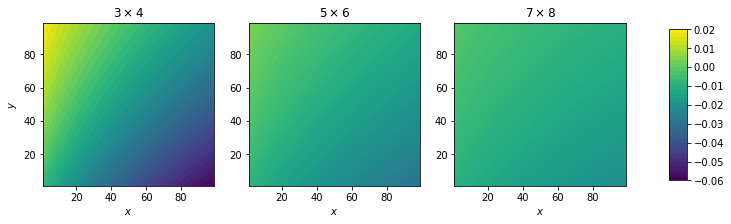

In [6]:
s = 1000
x = np.arange(1, 100)
y = np.arange(1, 100)
X, Y = np.meshgrid(x, y)

m_list = [3, 5, 7]
logBF_list = []
for m in m_list:
    n = m + 1
    N = calc_N_grid(m=m, n=n, s=s, x=X, y=Y)
    delta_F = calc_delta_F_noprior_grid(m*n, N)
    logBF = calc_plogp_alpha_grid(s, X, Y, N) + calc_PlogP_grid(s, X, N) + delta_F
    logBF_list.append(logBF)

vmin = min([logBF.min() for logBF in logBF_list])
vmax = max([logBF.max() for logBF in logBF_list])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
nlevels = 40

#===================================================================

top = ax[0].contourf(X, Y, logBF_list[0], levels=nlevels, vmin=vmin, vmax=vmax)
ax[0].set_title(r'$3\times 4$')
ax[0].set_ylabel(r'$y$')
ax[0].set_xlabel(r'$x$')
ax[1].contourf(X, Y, logBF_list[1], levels=nlevels, vmin=vmin, vmax=vmax)
ax[1].set_title(r'$5\times 6$')
ax[1].set_xlabel(r'$x$')
ax[2].contourf(X, Y, logBF_list[2], levels=nlevels, vmin=vmin, vmax=vmax)
ax[2].set_title(r'$7\times 8$')
ax[2].set_xlabel(r'$x$')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(top, cax=cbar_ax)
fig.savefig('figures/simple-models/grid-logBF-gridsize.png')

### Compare $\log BF_\alpha / N$ for different self-transition counts

<img src='figures/simple-models/grid-logBF-s.png' style="width: 300px;">

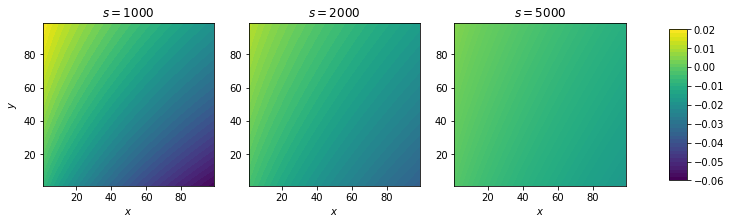

In [5]:
m = 3; n = 4
x = np.arange(1, 100)
y = np.arange(1, 100)
X, Y = np.meshgrid(x, y)

s_list = [1000, 2000, 5000]
logBF_list = []
for s in s_list:
    n = m + 1
    N = calc_N_grid(m=m, n=n, s=s, x=X, y=Y)
    delta_F = calc_delta_F_noprior_grid(m*n, N)
    logBF = calc_plogp_alpha_grid(s, X, Y, N) + calc_PlogP_grid(s, X, N) + delta_F
    logBF_list.append(logBF)

vmin = min([logBF.min() for logBF in logBF_list])
vmax = max([logBF.max() for logBF in logBF_list])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
nlevels = 40

#===================================================================

for i, s in enumerate(s_list):
    ax[i].set_title(f'$s = ${s}')
    ax[i].set_xlabel(r'$x$')
    if i == 0:
        top = ax[i].contourf(X, Y, logBF_list[i], levels=nlevels, vmin=vmin, vmax=vmax)
    else:
        ax[i].contourf(X, Y, logBF_list[i], levels=nlevels, vmin=vmin, vmax=vmax)

ax[0].set_ylabel(r'$y$')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(top, cax=cbar_ax)
fig.savefig('figures/simple-models/grid-logBF-s.png')

# Bowman Fig. 1 model

<img src="figures/bowman-model/model.png" style="width: 200px;">

/home/bharland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/bharland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/bharland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


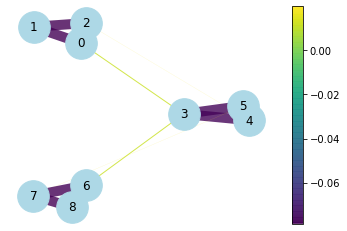

In [7]:
from BowmanModel import BowmanModel

m = BowmanModel('figures/bowman-model')
m.calc_log_BF_matrix()
log_BF_min = []
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('9-counts-bf.png')

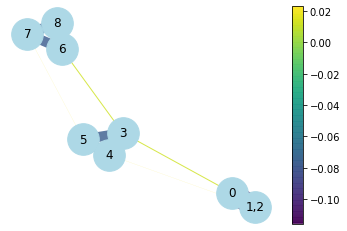

In [8]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('8-counts-bf.png')

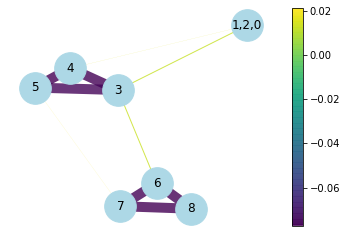

In [9]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('7-counts-bf.png')

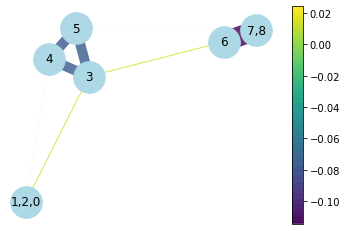

In [10]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('6-counts-bf.png')

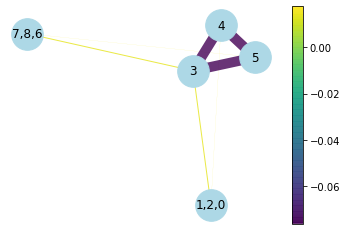

In [11]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('5-counts-bf.png')

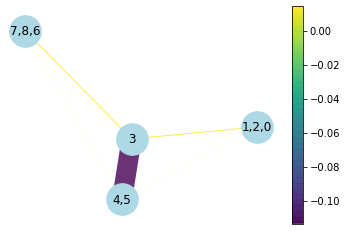

In [12]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('4-counts-bf.png')

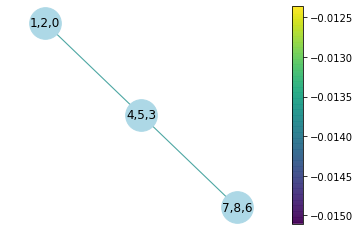

In [13]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('3-counts-bf.png')

In [14]:
log_BF_min_bowman = [-0.07866348611610544,
                     -0.11577350189862207,
                     -0.07736832974528066,
                     -0.11453159224513243,
                     -0.07612484267356392,
                     -0.11361981899903373,
                     -0.01373383520837157]
M_bowman = [m for m in range(9, 2, -1)]

# Three macrostate model

<img src="figures/three-macrostate-model/12-counts-bf.png" style="width: 250px;">

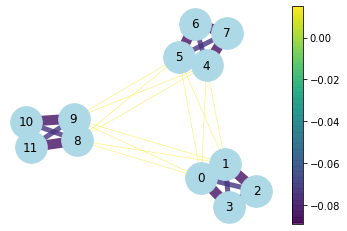

In [15]:
from ThreeMacrostateModel import ThreeMacrostateModel

m = ThreeMacrostateModel('figures/three-macrostate-model/')
m.calc_log_BF_matrix()
log_BF_min = []
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('12-counts-bf.png')

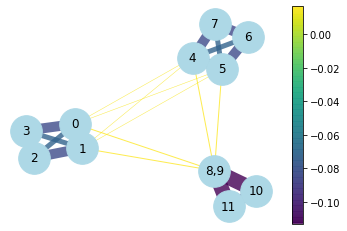

In [16]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('11-counts-bf.png')

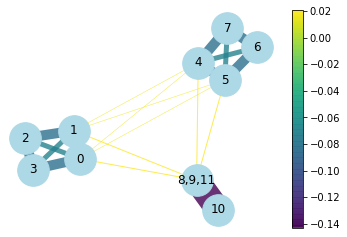

In [17]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('10-counts-bf.png')

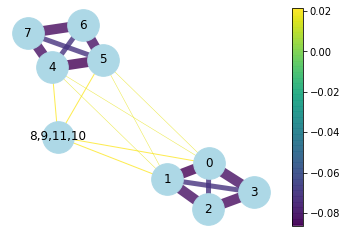

In [18]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('9-counts-bf.png')

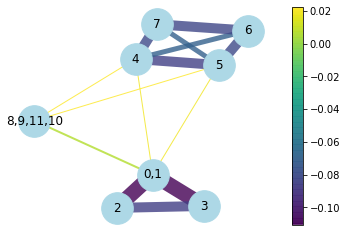

In [19]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('8-counts-bf.png')

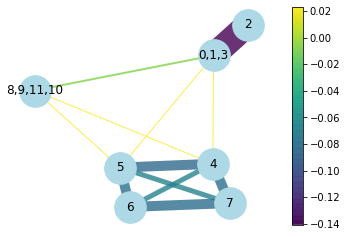

In [20]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('7-counts-bf.png')

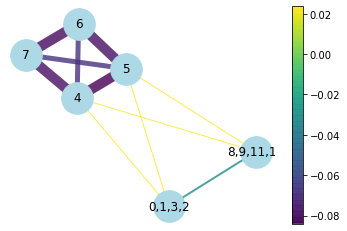

In [21]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('6-counts-bf.png')

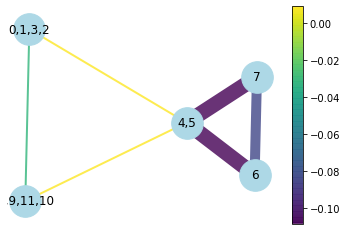

In [22]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('5-counts-bf.png')

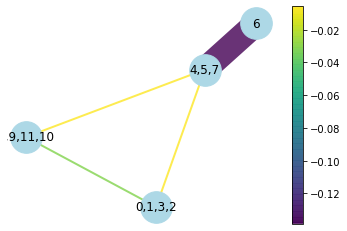

In [23]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('4-counts-bf.png')

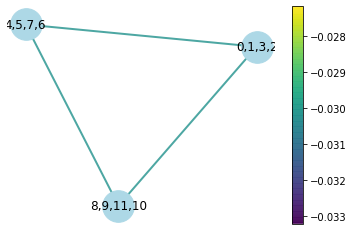

In [24]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('3-counts-bf.png')

In [25]:
M_three_macrostate = [m for m in range(12, 2, -1)]
log_BF_min_three_macrostate = [-0.08882071427979571,
                             -0.11309324952376337,
                             -0.14288616834167264,
                             -0.08632177815434122,
                             -0.11066428490255731,
                             -0.14053561328425265,
                             -0.08406042519212995,
                             -0.10850645339698001,
                             -0.13850128683341986,
                             -0.03019728715819958]

# Bottleneck model

<img src='figures/bottleneck-model/13-counts-bf.png' style="width: 200px;">

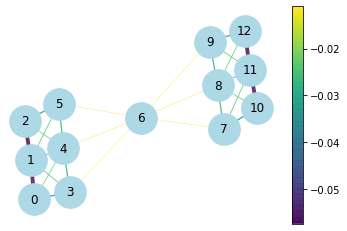

In [26]:
from BottleneckModel import BottleneckModel

m = BottleneckModel('figures/bottleneck-model/')
m.calc_log_BF_matrix()
log_BF_min = []
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('13-counts-bf.png')

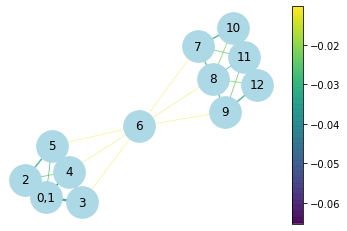

In [27]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('12-counts-bf.png')

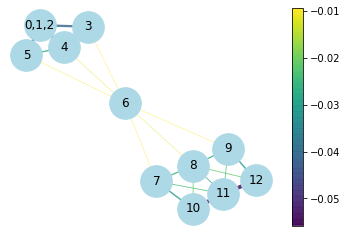

In [28]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('11-counts-bf.png')

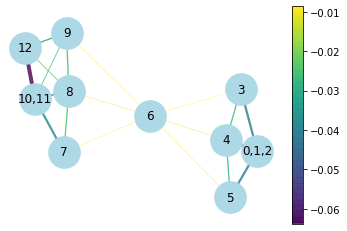

In [29]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('10-counts-bf.png')

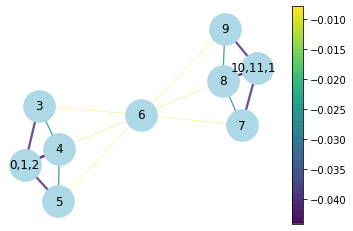

In [30]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('9-counts-bf.png')

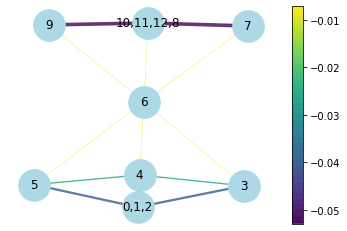

In [31]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('8-counts-bf.png')

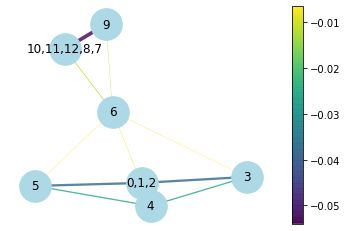

In [32]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('7-counts-bf.png')

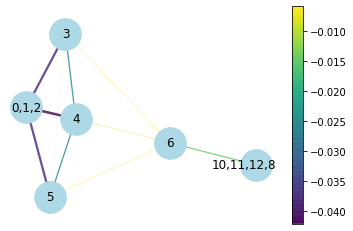

In [33]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('6-counts-bf.png')

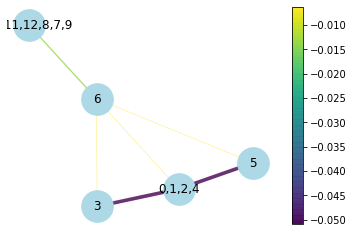

In [34]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('5-counts-bf.png')

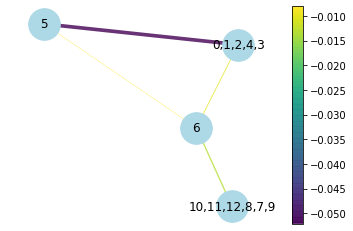

In [35]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('4-counts-bf.png')

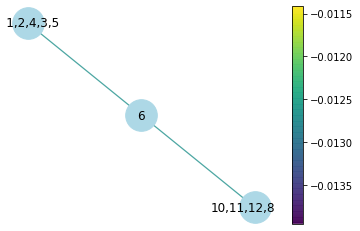

In [36]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('3-counts-bf.png')

In [37]:
M_bottleneck = [m for m in range(13, 2, -1)]
log_BF_min_bottleneck = [-0.057422895532266816,
                         -0.06534755303512021,
                         -0.055837552564115406,
                         -0.06379893480865953,
                         -0.04414968964963273,
                         -0.052930802258511045,
                         -0.05401457032947199,
                         -0.042075512940856014,
                         -0.05095157834914116,
                         -0.05214862873924822,
                         -0.012684791010730015]

# Two channel model


<table>
    <td> <img src='figures/two-channel-model/model-grid.png' style="width: 200px;"> </td>
    <td> <img src='figures/two-channel-model/model-crosses.png' style="width: 200px;"> </td>
<table>  

### Crosses model

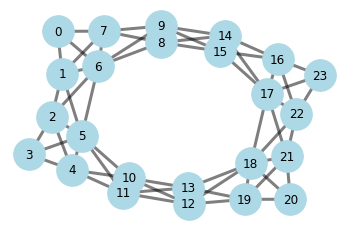

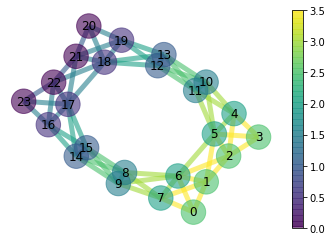

In [38]:
from TwoChannelModel import TwoChannelModel
m = TwoChannelModel('figures/two-channel-model', with_grid=False)

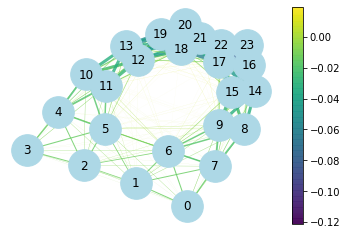

In [39]:
m.calc_log_BF_matrix()
log_BF_min = []
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('24-crosses.png')

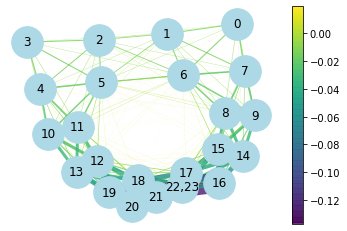

In [40]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('23-crosses.png')

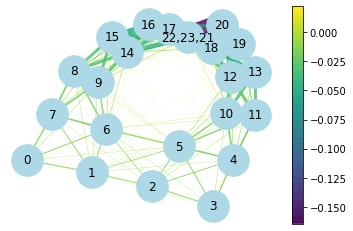

In [41]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('22-crosses.png')

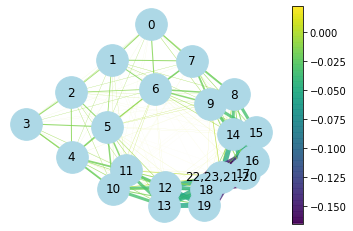

In [42]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('21-crosses.png')

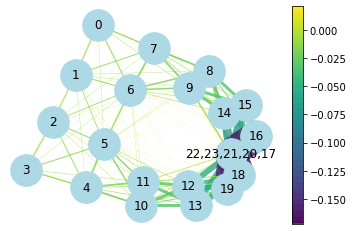

In [43]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('20-crosses.png')

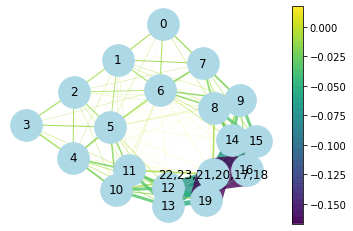

In [44]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('19-crosses.png')

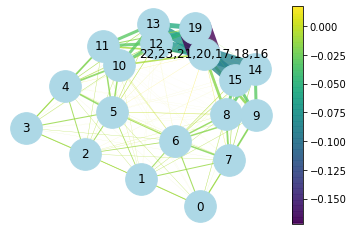

In [45]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('18-crosses.png')

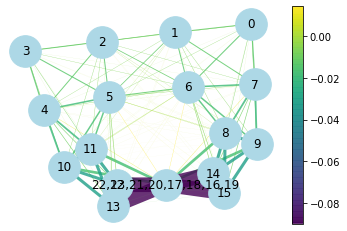

In [46]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('17-crosses.png')

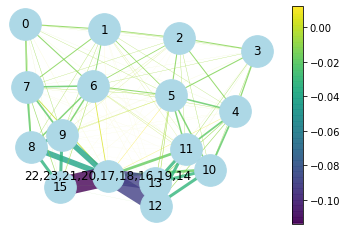

In [47]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('16-crosses.png')

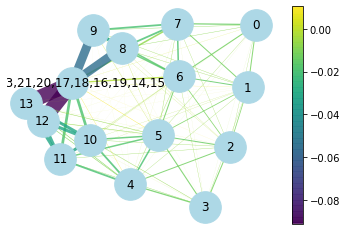

In [48]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('15-crosses.png')

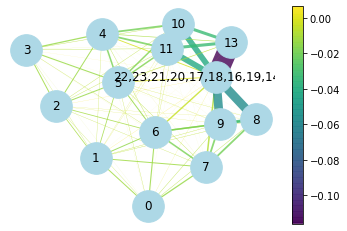

In [49]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('14-crosses.png')

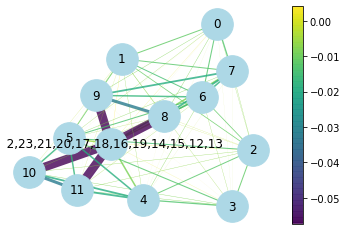

In [50]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('13-crosses.png')

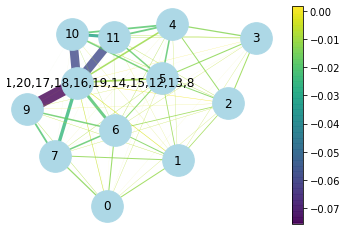

In [51]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('12-crosses.png')

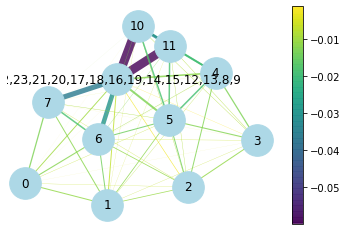

In [52]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('11-crosses.png')

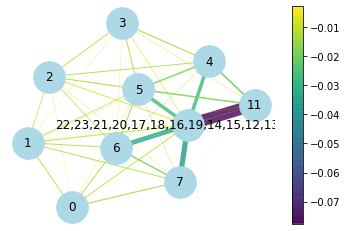

In [53]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('10-crosses.png')

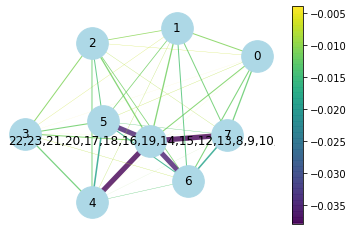

In [54]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('9-crosses.png')

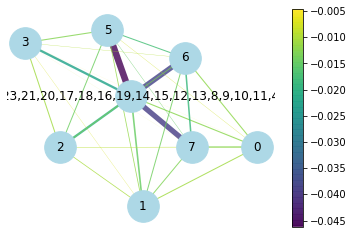

In [55]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('8-crosses.png')

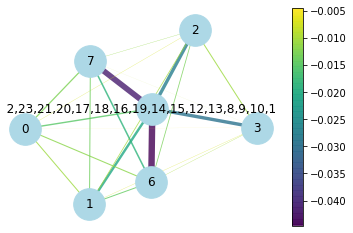

In [56]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('7-crosses.png')

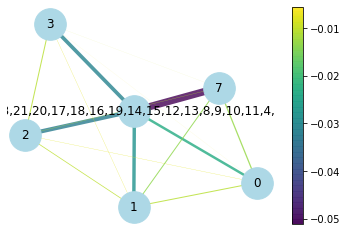

In [57]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('6-crosses.png')

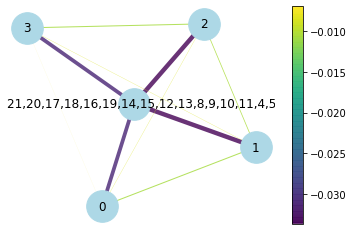

In [58]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('5-crosses.png')

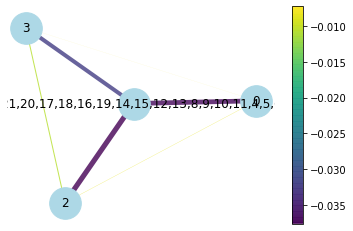

In [59]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('4-crosses.png')

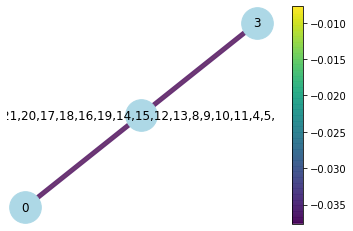

In [60]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('3-crosses.png')

In [63]:
M_two_channel = [m for m in range(24, 2, -1)]
log_BF_min_two_channel_crosses = [-0.12145509402186278,
                                 -0.13717139007389922,
                                 -0.16460824631050103,
                                 -0.16506925357316307,
                                 -0.1722295244343578,
                                 -0.16705422457438587,
                                 -0.17192188062306682,
                                 -0.08987016114783203,
                                 -0.11389285365486063,
                                 -0.09128949233116929,
                                 -0.11598340661243584,
                                 -0.05735211207956917,
                                 -0.07560275497532093,
                                 -0.0598439985915144,
                                 -0.07767617148399046,
                                 -0.03788805478751607,
                                 -0.04619751365259524,
                                 -0.04463974675787216,
                                 -0.05113629264199315,
                                 -0.033637643633027986,
                                 -0.0375820550227916,
                                 -0.03764869316039278]

### Grid model

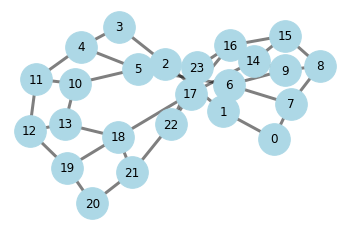

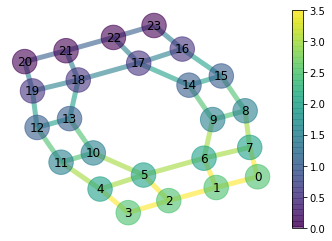

In [64]:
m = TwoChannelModel('figures/two-channel-model', with_grid=True)

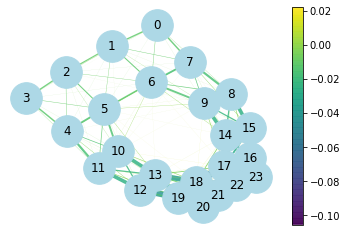

In [65]:
m.calc_log_BF_matrix()
log_BF_min = []
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('24-grid.png')

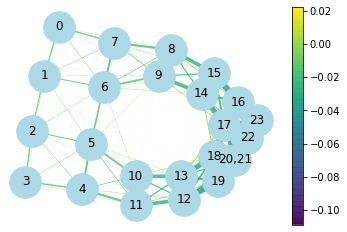

In [66]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('23-grid.png')

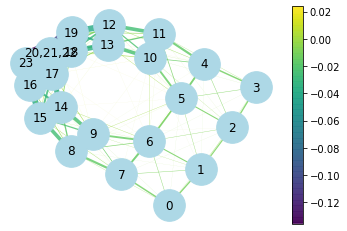

In [67]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('22-grid.png')

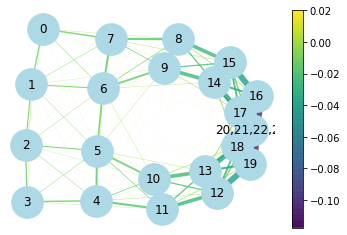

In [68]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('21-grid.png')

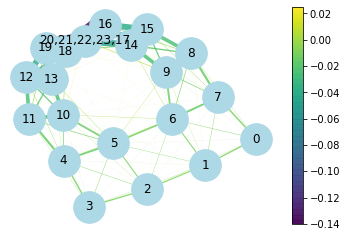

In [69]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('20-grid.png')

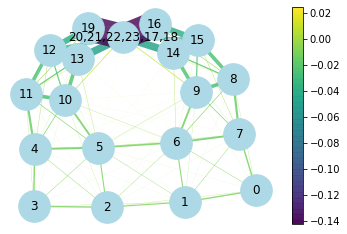

In [70]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('19-grid.png')

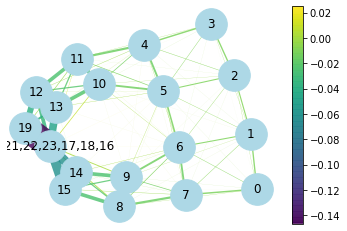

In [71]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('18-grid.png')

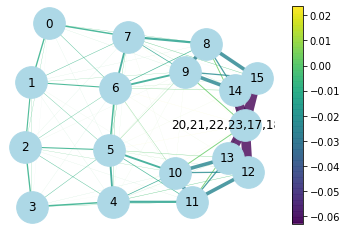

In [72]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('17-grid.png')

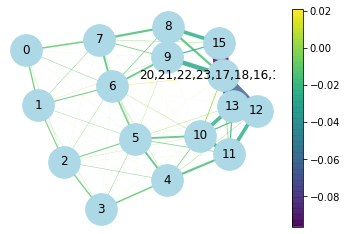

In [73]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('16-grid.png')

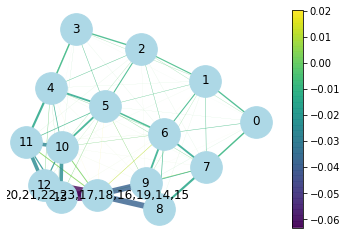

In [74]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('15-grid.png')

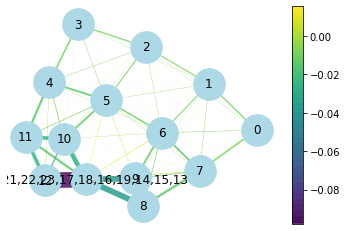

In [75]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('14-grid.png')

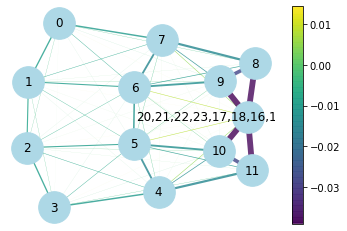

In [76]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('13-grid.png')

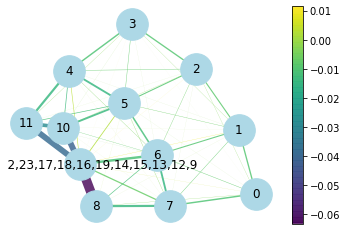

In [77]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('12-grid.png')

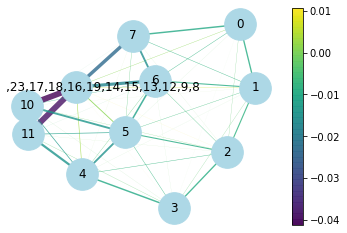

In [78]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('11-grid.png')

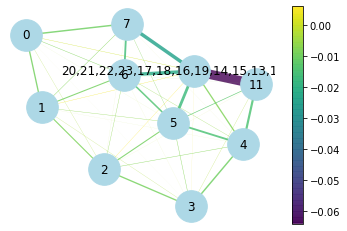

In [79]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('10-grid.png')

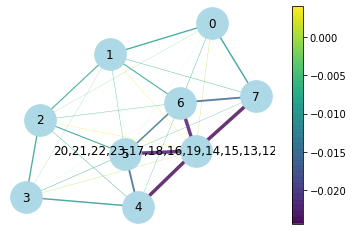

In [80]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('9-grid.png')

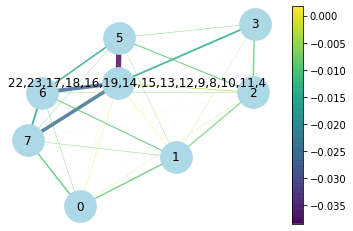

In [81]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('8-grid.png')

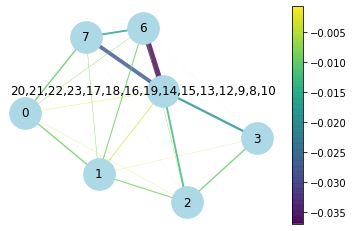

In [82]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('7-grid.png')

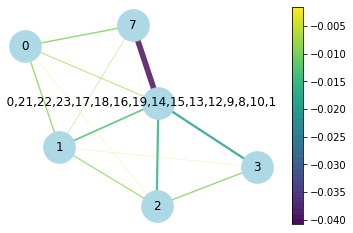

In [83]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('6-grid.png')

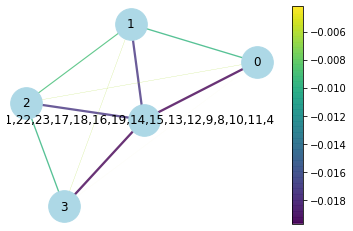

In [84]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('5-grid.png')

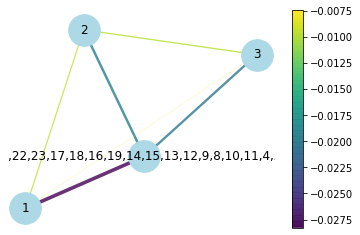

In [85]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('4-grid.png')

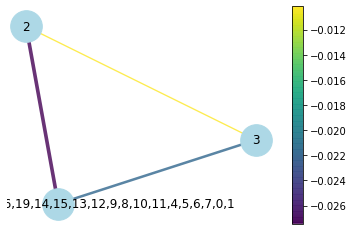

In [86]:
m.merge_best_pair_states()
m.calc_log_BF_matrix()
log_BF_min.append(m.log_BF_matrix.min())
m.draw_graph_cbf('3-grid.png')

In [87]:
M_two_channel = [m for m in range(24, 2, -1)]
log_BF_min_two_channel_grid = [-0.10559768612863002,
                             -0.10904049616037581,
                             -0.13570643193626408,
                             -0.11764771428562637,
                             -0.14041701609002125,
                             -0.1427219079630906,
                             -0.14680108773420605,
                             -0.06297183606072998,
                             -0.09634510017975353,
                             -0.063237806315037,
                             -0.09786418623581722,
                             -0.03912748047649148,
                             -0.0633187468238062,
                             -0.04124176274697465,
                             -0.06398340898025696,
                             -0.024354497493711866,
                             -0.03837449565736166,
                             -0.036986196747874775,
                             -0.040824420708730935,
                             -0.01970970122918743,
                             -0.02829301797819729,
                             -0.027448177812769647]

# Min $\log BF / N$ during clustering

<img src='figures/clustering.png' style="width: 300px;">

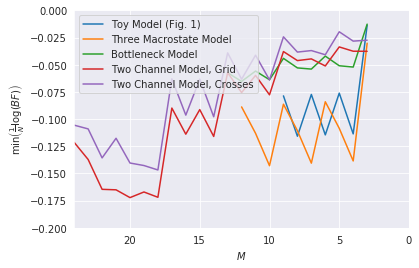

In [90]:
import seaborn as sns

sns.set_style("darkgrid")
# plt.tight_layout()
plt.xlim(24, 0)  # decreasing 
plt.ylim(-0.2, 0)
plt.xlabel('$M$')
plt.ylabel(r'${\rm min}\left(\frac{1}{N}\log(BF)\right)$')

plt.plot(M_bowman, log_BF_min_bowman, '-', label='Toy Model (Fig. 1)')
plt.plot(M_three_macrostate, log_BF_min_three_macrostate, '-', label='Three Macrostate Model')
plt.plot(M_bottleneck, log_BF_min_bottleneck, '-', label='Bottleneck Model')
# plt.plot(np.arange(13, 2, -1), np.array(log_BF_bottleneck_tau01), '-', label='Bottleneck Model, $\tau =0.1$')
# plt.plot(np.arange(24, 2, -1), np.array(log_BF_twochannel), '-', label='Two Channel Model, Crosses')
plt.plot(M_two_channel, log_BF_min_two_channel_crosses, '-', label='Two Channel Model, Grid')
plt.plot(M_two_channel, log_BF_min_two_channel_grid, '-', label='Two Channel Model, Crosses')
plt.legend(loc=2)
plt.savefig('figures/clustering.png', dpi=200, bbox_inches="tight") 